In [6]:
# imports 
import matplotlib.pyplot as plt
from pydub import AudioSegment
import numpy as np
import wave, sys
import os
import cv2
from scipy.fft import rfft, rfftfreq

In [7]:
target = "Pathogen"

if os.path.exists("Audio/")!=True:
    os.mkdir("Audio/")
if os.path.exists("Audio/")!=True:
    os.mkdir("Output/")

sound = AudioSegment.from_wav("Audio/"+target+".wav")#Convert stereo to mono
sound = sound.set_channels(1)
sound.export("Audio/"+target+"Mono.wav", format="wav")

# reading the audio file 
raw = wave.open("Audio/"+target+"Mono.wav")
raw.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=11339776, comptype='NONE', compname='not compressed')

In [8]:
# reads all the frames  
# -1 indicates all or max frames 
signal = raw.readframes(-1) 
signal = np.frombuffer(signal, dtype ="int16") 

In [9]:
# gets the frame rate 
f_rate = raw.getframerate()

In [10]:
# to Plot the x-axis in seconds  
# you need get the frame rate  
# and divide by size of your signal 
# to create a Time Vector  
# spaced linearly with the size  
# of the audio file 
time = np.linspace( 
    0, # start 
    len(signal) / f_rate, 
    num = len(signal) 
) 
print(len(time))
print(len(signal))

11339776
11339776


Handling frame: 0 of 7714.133 Which is 0.000 seconds. Progress: 0.000%
Handling frame: 1 of 7714.133 Which is 0.033 seconds. Progress: 0.013%
Handling frame: 2 of 7714.133 Which is 0.067 seconds. Progress: 0.026%
Handling frame: 3 of 7714.133 Which is 0.100 seconds. Progress: 0.039%
Handling frame: 4 of 7714.133 Which is 0.133 seconds. Progress: 0.052%
Handling frame: 5 of 7714.133 Which is 0.167 seconds. Progress: 0.065%
Handling frame: 6 of 7714.133 Which is 0.200 seconds. Progress: 0.078%
Handling frame: 7 of 7714.133 Which is 0.233 seconds. Progress: 0.091%
Handling frame: 8 of 7714.133 Which is 0.267 seconds. Progress: 0.104%
Handling frame: 9 of 7714.133 Which is 0.300 seconds. Progress: 0.117%
Handling frame: 10 of 7714.133 Which is 0.333 seconds. Progress: 0.130%
Handling frame: 11 of 7714.133 Which is 0.367 seconds. Progress: 0.143%


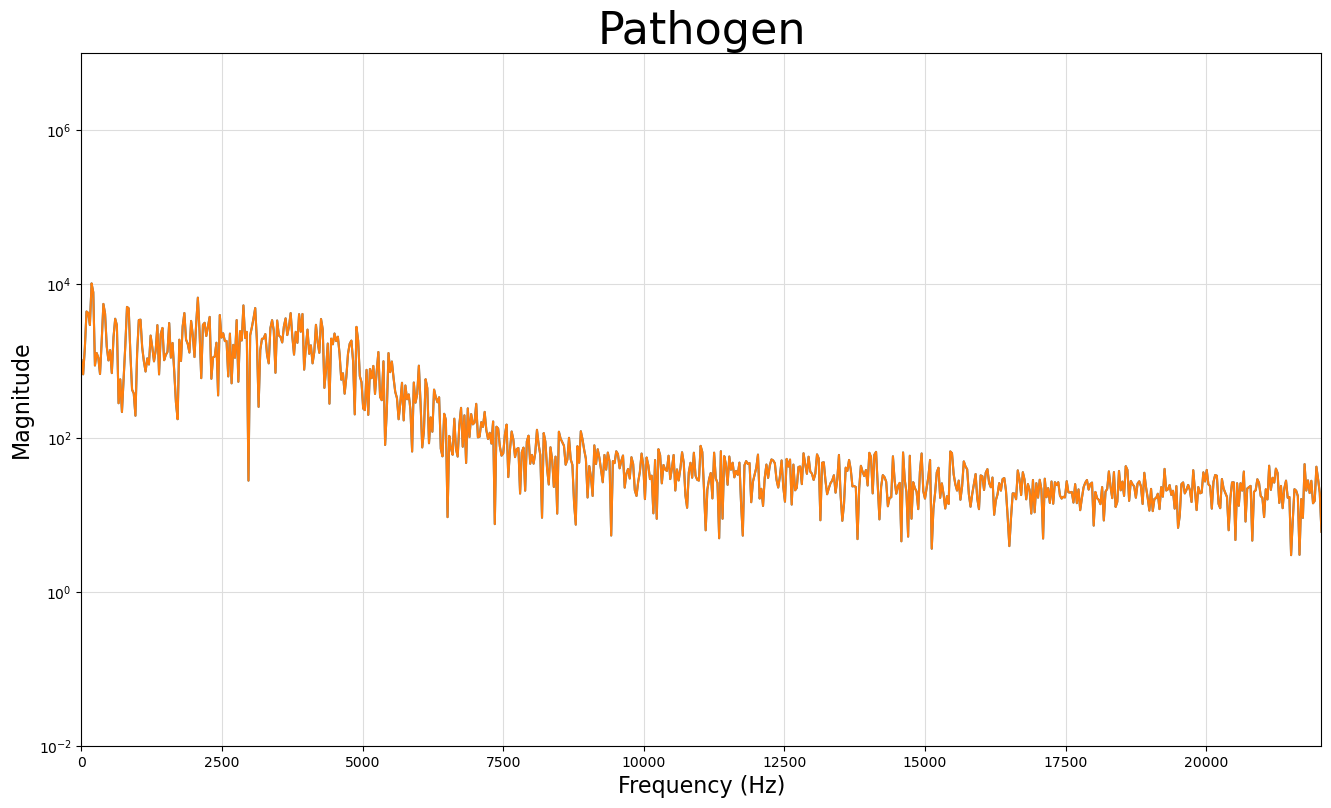

In [11]:
DURATION = 1/30  # 1/30 sec
frameDuration = int(f_rate*DURATION) # 1/30sec has 2940 frame
# Number of samples in normalized_tone
N = frameDuration
itter = 0

try:
    for i in np.arange(0, len(signal), frameDuration):
        # Note the extra 'r' at the front
        yf = rfft(signal[i:i+frameDuration])
        xf = rfftfreq(N, 1/f_rate)
        print("Handling frame: " + str(itter) + " of " + "{:.3f}".format(len(signal)/frameDuration) + " Which is " + "{:.3f}".format(itter/30) + " seconds. Progress: " + "{:.3f}".format((i/len(signal))*100) + "%")
        plt.figure(figsize=(16,9))
        plt.ylim(0.01, 10000000)
        plt.title(target, fontsize=32)
        plt.plot(xf, np.abs(yf))#For normal view
        plt.semilogy(xf, np.abs(yf))#For log view
        plt.xlabel('Frequency (Hz)', fontsize=16)
        plt.ylabel('Magnitude', fontsize=16)
        plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
        plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

        plt.margins(x=0)
        plt.savefig("Output/"+target+str(itter), dpi=300)
        #plt.clf()
        plt.close()
        itter+=1
except:
    pass

In [ ]:
out_video_name = target + ".mp4"
out_video_full_path = "Output/"+out_video_name

pre_imgs = os.listdir("Output")
#print(pre_imgs)
img = []

for i in range(0, len(pre_imgs), 1):
    filename = "Output/"+target+str(i)+".png"
    #print(i)
    img.append(filename)

# print(img)

cv2_fourcc = cv2.VideoWriter_fourcc(*'mp4v')

frame = cv2.imread(img[0])
size = list(frame.shape)
del size[2]
size.reverse()
# print(size)

video = cv2.VideoWriter(out_video_full_path, cv2_fourcc, 30, size) #output video name, fourcc, fps, size

for i in range(len(img)): 
    video.write(cv2.imread(img[i]))
    print("Handling frame: " + str(i) + " of " + str(len(img)) + " Which is " + "{:.3f}".format(i/30) + " seconds. Progress: " + "{:.3f}".format((i/len(img))*100) + "%")

video.release()
print('outputed video')

Handling frame: 0 of 7715 Which is 0.000 seconds. Progress: 0.000%
Handling frame: 1 of 7715 Which is 0.033 seconds. Progress: 0.013%
Handling frame: 2 of 7715 Which is 0.067 seconds. Progress: 0.026%
Handling frame: 3 of 7715 Which is 0.100 seconds. Progress: 0.039%
Handling frame: 4 of 7715 Which is 0.133 seconds. Progress: 0.052%
Handling frame: 5 of 7715 Which is 0.167 seconds. Progress: 0.065%
Handling frame: 6 of 7715 Which is 0.200 seconds. Progress: 0.078%
Handling frame: 7 of 7715 Which is 0.233 seconds. Progress: 0.091%
Handling frame: 8 of 7715 Which is 0.267 seconds. Progress: 0.104%
Handling frame: 9 of 7715 Which is 0.300 seconds. Progress: 0.117%
Handling frame: 10 of 7715 Which is 0.333 seconds. Progress: 0.130%
Handling frame: 11 of 7715 Which is 0.367 seconds. Progress: 0.143%
Handling frame: 12 of 7715 Which is 0.400 seconds. Progress: 0.156%
Handling frame: 13 of 7715 Which is 0.433 seconds. Progress: 0.169%
Handling frame: 14 of 7715 Which is 0.467 seconds. Progres